In [1]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [2]:
# Importing data
train_df = pd.read_csv('E:/Documents/Programmation/Python/Kaggle/Titanic/train.csv', sep=",")
test_df = pd.read_csv('E:/Documents/Programmation/Python/Kaggle/Titanic/test.csv', sep=",")
test_data = pd.read_csv('E:/Documents/Programmation/Python/Kaggle/Titanic/test.csv', sep=",")

print("train_df's dimensions are {}".format(train_df.shape))
print("test_df's dimensions are {}".format(test_df.shape))
print('\n')
print("train_df's data types are :")
print(train_df.info())

train_df's dimensions are (891, 12)
test_df's dimensions are (418, 11)


train_df's data types are :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [3]:
print("Missing values : \n{}".format(train_df.isnull().sum()))

Missing values : 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [7]:
# Links between features and target

# Pclass
train_df['count']=train_df.groupby('Pclass')['Pclass'].transform('count')
print(train_df[['Pclass','Survived','count']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False))
del train_df['count']

   Pclass  Survived  count
0       1  0.629630  216.0
1       2  0.472826  184.0
2       3  0.242363  491.0


In [8]:
# Sex

train_df['count']=train_df.groupby('Sex')['Sex'].transform('count')
print(train_df[['Sex','Survived','count']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False))
del train_df['count']

      Sex  Survived  count
0  female  0.742038  314.0
1    male  0.188908  577.0


In [9]:
# Age 1

train_df['AgeBand']=pd.cut(train_df.Age, bins=[0,15,30,60,120], labels=['0-15','15-30','30-60','60 +'])
train_df.AgeBand=train_df.AgeBand.replace(np.nan, 'Unknown', regex=True)
train_df['AgeBand'].value_counts()

15-30      326
30-60      283
Unknown    177
0-15        83
60 +        22
Name: AgeBand, dtype: int64

In [10]:
# Age 2

train_df['count']=train_df.groupby('AgeBand')['AgeBand'].transform('count')
print(train_df[['AgeBand','Survived','count']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='Survived', ascending=False))
del train_df['count']

   AgeBand  Survived  count
0     0-15  0.590361   83.0
2    30-60  0.420495  283.0
1    15-30  0.358896  326.0
4  Unknown  0.293785  177.0
3     60 +  0.227273   22.0


In [11]:
# SibSp

train_df['count']=train_df.groupby('SibSp')['SibSp'].transform('count')
print(train_df[['SibSp','Survived','count']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False))
del train_df['count']

   SibSp  Survived  count
1      1  0.535885  209.0
2      2  0.464286   28.0
0      0  0.345395  608.0
3      3  0.250000   16.0
4      4  0.166667   18.0
5      5  0.000000    5.0
6      8  0.000000    7.0


In [12]:
# Parch

train_df['count']=train_df.groupby('Parch')['Parch'].transform('count')
print(train_df[['Parch','Survived','count']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False))
del train_df['count']

   Parch  Survived  count
3      3  0.600000    5.0
1      1  0.550847  118.0
2      2  0.500000   80.0
0      0  0.343658  678.0
5      5  0.200000    5.0
4      4  0.000000    4.0
6      6  0.000000    1.0


In [13]:
# Fare 1
train_df['FareBand']=pd.qcut(train_df['Fare'], 4, labels=['1','2','3','4'])
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,1,0.197309
1,2,0.303571
2,3,0.454955
3,4,0.581081


In [14]:
# Fare 2

train_df['count']=train_df.groupby('FareBand')['FareBand'].transform('count')
print(train_df[['FareBand','Survived','count']].groupby(['FareBand'], as_index=False).mean().sort_values(by='Survived', ascending=True))
del train_df['count']

  FareBand  Survived  count
0        1  0.197309  223.0
1        2  0.303571  224.0
2        3  0.454955  222.0
3        4  0.581081  222.0


In [15]:
# Embarked

freq_port = train_df['Embarked'].dropna().mode()[0]
print(freq_port)

train_df['Embarked']=train_df['Embarked'].fillna(freq_port)

train_df['count']=train_df.groupby('Embarked')['Embarked'].transform('count')
print(train_df[['Embarked','Survived','count']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=True))
del train_df['count']

S
  Embarked  Survived  count
2        S  0.339009  646.0
1        Q  0.389610   77.0
0        C  0.553571  168.0


AttributeError: 'module' object has no attribute 'title'

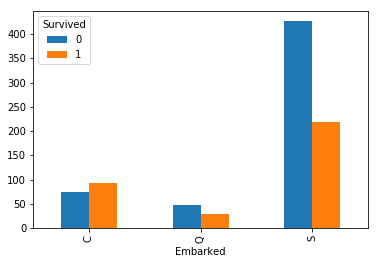

In [16]:
# Data visualization

%matplotlib inline
pd.crosstab(train_df.Embarked, train_df.Survived).plot(kind='bar')
plt.title('Survival frequency vs Embarking place')
plt.xlabel('Embarked')
plt.ylabel('Frequency')
plt.savefig('frequency_embarked')

C:\ProgramData\Anaconda2\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\Anaconda2\lib\site-packages\seaborn\axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


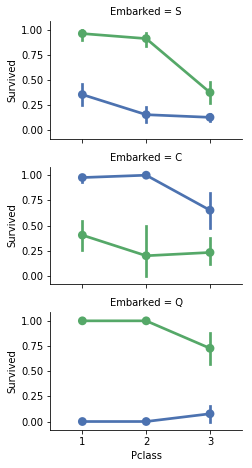

In [17]:
# Interaction visualization

grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')

In [18]:
# Preparing the data

train_df['Title']=train_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [19]:
train_df['Title']=train_df['Title'].replace(['Lady','Countess','Capt','Col',\
'Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')

train_df['Title']=train_df['Title'].replace('Mlle', 'Miss')
train_df['Title']=train_df['Title'].replace('Ms', 'Miss')
train_df['Title']=train_df['Title'].replace('Mme', 'Mrs')

train_df['count']=train_df.groupby('Title')['Title'].transform('count')
print(train_df[['Title','Survived','count']].groupby(['Title'],as_index=False).mean().sort_values(by='Survived',ascending=True))
del train_df['count']

    Title  Survived  count
2      Mr  0.156673  517.0
4    Rare  0.347826   23.0
0  Master  0.575000   40.0
1    Miss  0.702703  185.0
3     Mrs  0.793651  126.0


In [20]:
# New variables
train_df['women']=train_df['Sex'].map({'female':1, 'male':0})

train_df['count']=train_df.groupby('women')['women'].transform('count')
print(train_df[['women','Survived','count']].groupby(['women'],as_index=False).mean().sort_values(by='Survived',ascending=True))
del train_df['count']

   women  Survived  count
0      0  0.188908  577.0
1      1  0.742038  314.0


In [21]:
train_df['FamilySize']=train_df['SibSp']+train_df['Parch']+1

train_df['count']=train_df.groupby('FamilySize')['FamilySize'].transform('count')
print(train_df[['FamilySize','Survived','count']].groupby(['FamilySize'],as_index=False).mean().sort_values(by='Survived',ascending=True))
del train_df['count']

   FamilySize  Survived  count
7           8  0.000000    6.0
8          11  0.000000    7.0
5           6  0.136364   22.0
4           5  0.200000   15.0
0           1  0.303538  537.0
6           7  0.333333   12.0
1           2  0.552795  161.0
2           3  0.578431  102.0
3           4  0.724138   29.0


In [22]:
train_df['IsAlone']=0
train_df.loc[train_df['FamilySize']==1,'IsAlone']=1

train_df['count']=train_df.groupby('IsAlone')['IsAlone'].transform('count')
print(train_df[['IsAlone','Survived','count']].groupby(['IsAlone'],as_index=False).mean().sort_values(by='Survived',ascending=True))
del train_df['count']

   IsAlone  Survived  count
1        1  0.303538  537.0
0        0  0.505650  354.0


In [23]:
# Deleting useless columns
train_df = train_df.drop(['Ticket','Cabin','Age','Name','PassengerId','Sex'],axis=1)

In [24]:
# Dichotomising categorical variables
train_df=pd.concat([train_df, pd.get_dummies(train_df['Title'], prefix='Title')],axis=1)
train_df=pd.concat([train_df, pd.get_dummies(train_df['AgeBand'], prefix='AgeBand')],axis=1)
train_df=pd.concat([train_df, pd.get_dummies(train_df['FareBand'], prefix='FareBand')],axis=1)
train_df=pd.concat([train_df, pd.get_dummies(train_df['Embarked'], prefix='Embarked')],axis=1)

train_df.Pclass = train_df['Pclass'].astype('category')
train_df=pd.concat([train_df, pd.get_dummies(train_df['Pclass'], prefix='Pclass')],axis=1)

del train_df['Title']
del train_df['Pclass']
del train_df['FareBand']
del train_df['Fare']
del train_df['AgeBand']
del train_df['Embarked']

In [25]:
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [26]:
# Same data preparation for test data

test_df['AgeBand']=pd.cut(test_df.Age, bins=[0,15,30,60,120], labels=['0-15','15-30','30-60','60 +'])
test_df.AgeBand=test_df.AgeBand.replace(np.nan, 'Unknown', regex=True)
test_df['AgeBand'].value_counts()

test_df['FareBand']=pd.qcut(test_df['Fare'], 4, labels=['1','2','3','4'])

freq_port = test_df['Embarked'].dropna().mode()[0]

test_df['Embarked']=test_df['Embarked'].fillna(freq_port)

test_df['Title']=test_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(test_df['Title'], test_df['Sex'])

test_df['Title']=test_df['Title'].replace(['Lady','Countess','Capt','Col',\
'Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')

test_df['Title']=test_df['Title'].replace('Mlle', 'Miss')
test_df['Title']=test_df['Title'].replace('Ms', 'Miss')
test_df['Title']=test_df['Title'].replace('Mme', 'Mrs')

# New variables
test_df['women']=test_df['Sex'].map({'female':1, 'male':0})
test_df['FamilySize']=test_df['SibSp']+test_df['Parch']+1
test_df['IsAlone']=0
test_df.loc[test_df['FamilySize']==1,'IsAlone']=1

# Deleting useless columns
test_df = test_df.drop(['Ticket','Cabin','Age','Name','PassengerId','Sex'],axis=1)

test_df=pd.concat([test_df, pd.get_dummies(test_df['Title'], prefix='Title')],axis=1)
test_df=pd.concat([test_df, pd.get_dummies(test_df['AgeBand'], prefix='AgeBand')],axis=1)
test_df=pd.concat([test_df, pd.get_dummies(test_df['FareBand'], prefix='FareBand')],axis=1)
test_df=pd.concat([test_df, pd.get_dummies(test_df['Embarked'], prefix='Embarked')],axis=1)

test_df.Pclass = test_df['Pclass'].astype('category')
test_df=pd.concat([test_df, pd.get_dummies(test_df['Pclass'], prefix='Pclass')],axis=1)

del test_df['Title']
del test_df['Pclass']
del test_df['FareBand']
del test_df['Fare']
del test_df['AgeBand']
del test_df['Embarked']

In [27]:
test_df.head()

,SibSp,Parch,women,FamilySize,IsAlone,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,...,FareBand_1,FareBand_2,FareBand_3,FareBand_4,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,0,0,1,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
1,1,0,1,2,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1
2,0,0,0,1,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
3,0,0,0,1,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
4,1,1,1,3,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,1


In [28]:
train_df.columns

Index([u'Survived', u'SibSp', u'Parch', u'women', u'FamilySize', u'IsAlone',
       u'Title_Master', u'Title_Miss', u'Title_Mr', u'Title_Mrs',
       u'Title_Rare', u'AgeBand_0-15', u'AgeBand_15-30', u'AgeBand_30-60',
       u'AgeBand_60 +', u'AgeBand_Unknown', u'FareBand_1', u'FareBand_2',
       u'FareBand_3', u'FareBand_4', u'Embarked_C', u'Embarked_Q',
       u'Embarked_S', u'Pclass_1', u'Pclass_2', u'Pclass_3'],
      dtype='object')

In [29]:
# Preparing the data

X_train = train_df[['SibSp','Parch','women','FamilySize',\
                   'IsAlone','Title_Master','Title_Miss','Title_Mr','Title_Mrs','Title_Rare','AgeBand_0-15',\
                   'AgeBand_15-30','AgeBand_30-60','AgeBand_60 +','AgeBand_Unknown','FareBand_1','FareBand_2',\
                  'FareBand_3','FareBand_4','Embarked_C','Embarked_Q','Embarked_S','Pclass_1','Pclass_2','Pclass_3']]

Y_train = train_df[['Survived']]

In [30]:
# DecisionTree model

from sklearn import tree

decision_tree = tree.DecisionTreeClassifier(max_depth=5,min_samples_leaf=10)
decision_tree.fit(X_train, Y_train)

Y_pred = decision_tree.predict(test_df)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': Y_pred})
output.to_csv('E:/Documents/Programmation/Python/Kaggle/Titanic/my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
